# Phase 3 :

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Dataset/The_Processed_data.csv');
print(df)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

# Balance Data:

Check if the data is balanced or not:


In [18]:
value = df['Heart Attack Risk']

num1 = value[value == 1].count()
num2 = value[value == 0].count()

total = num1 + num2
percentage1= (num1 / total) * 100
percentage2 = (num2 / total) * 100

print("Number of people that have a risk of heart attack :", num1)
print("Number of people that have not a risk of heart attack.", num2)
print(" ")
print("Percentage of people who have a risk of heart attack: {:.2f}%".format(percentage1))
print("Percentage of people who have not a risk of heart attack: {:.2f}%".format(percentage2))

Number of people that have a risk of heart attack : 1852
Number of people that have not a risk of heart attack. 2148
 
Percentage of people who have a risk of heart attack: 46.30%
Percentage of people who have not a risk of heart attack: 53.70%



The number of people is 4000; we note that 1852 are at risk of having a heart attack, while 2148 are not at risk. In addition, we note that the data is balanced, as the percentage of those exposed to a risk is 46.3% and the percentage of those not exposed is 53.7%.

# Classification:

# Split the data into features and target variable

The code separates the features from the target variable, where X contains the features (all columns except the last one), and y contains the target variable "Heart Attack Risk."

In [19]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df["Heart Attack Risk"]
print(X)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

# Information Gain (entropy):
# Splitting Data into: 70% Training and 30% Test

The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

#Train decision tree classifer
clf_entropy= clf_entropy.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_entropy = clf_entropy.predict (X_test)

# confusion matrix:


[[369 257]
 [280 294]]


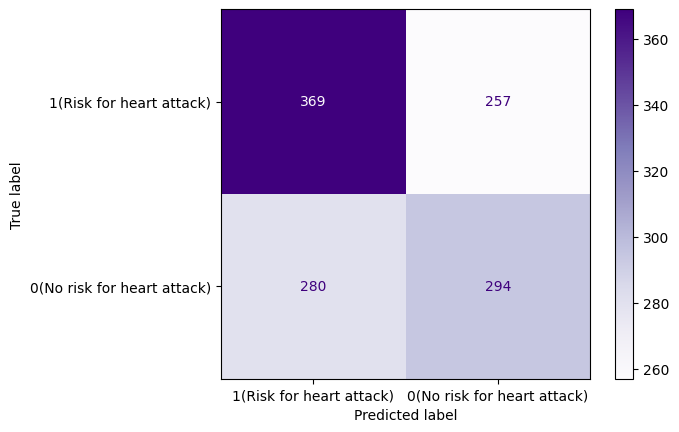

In [22]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (369): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 369 instances that do not have a risk of heart attack were correctly identified as such.

The top-right cell (257): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 257 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-left cell (280): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 280 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-right cell (294): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 294 instances that are at risk for heart attack were correctly identified as being at risk.

# Decision Tree:

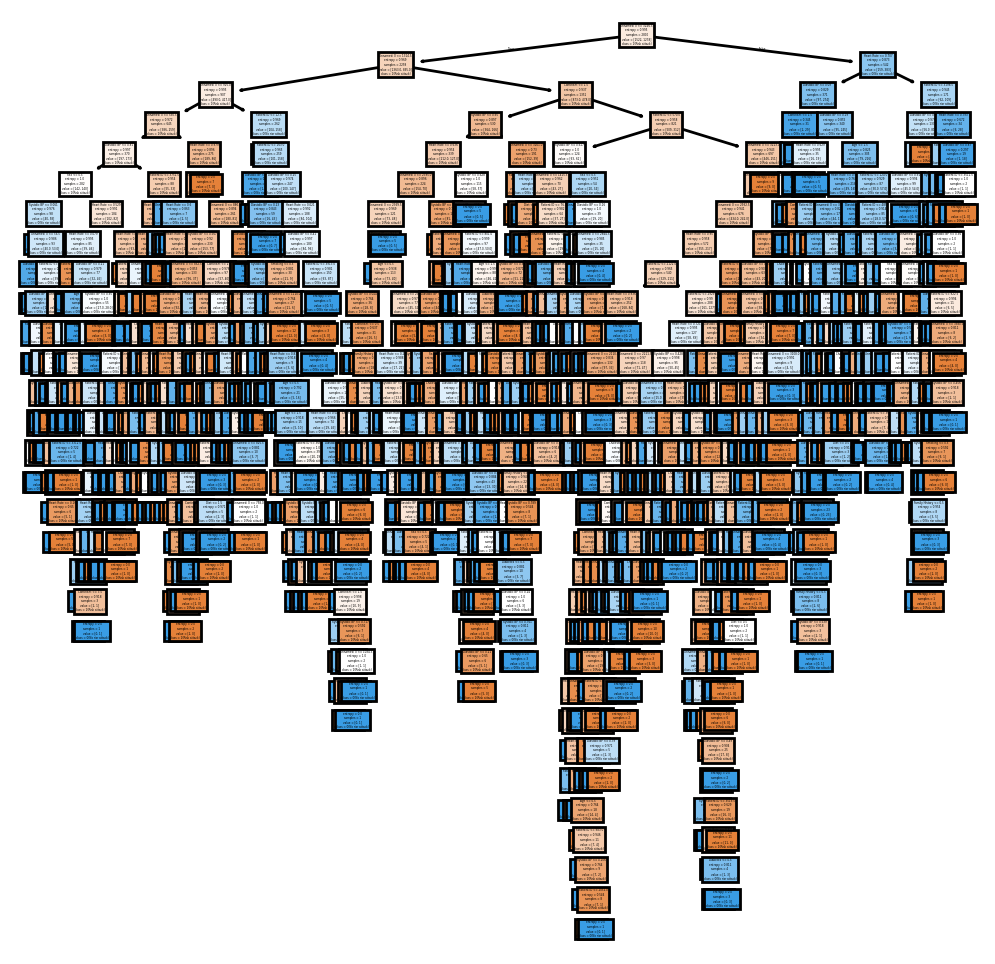

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf_entropy,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

The result of the code is a visual representation of a decision tree that illustrates how the data is split based on different features to determine the risk of heart attack. The tree begins at the root node, where the first feature is evaluated, and continues to branch out based on specific threshold values for various attribute. Each internal node represents a decision point based on a feature, while the leaf nodes indicate the final classification: whether there is a risk (1) or no risk (0) of heart attack. 

Overall, this decision tree provides insight into how the model makes classifications based on different health indicators, making it a valuable tool for understanding and interpreting heart attack risk assessments.

# Completing in model evaluation and selection:


In [24]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy)
print("Accuracy:", accuracy)

# Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.5525
Error Rate: 0.4475
Sensitivity: 0.5121951219512195
Specificity: 0.5894568690095847
Precision: 0.5335753176043557


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 55%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 44%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 51%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 58%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 53%.


Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 55% of cases.

At a sensitivity of 51%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 58%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 53%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Splitting Data into: 60% Training and 40% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 60% training and 40% testing subsets.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2. fit (X_train, y_train)

y_pred_entropy2 = clf2.predict (X_test)

# confusion matrix:

[[498 350]
 [375 377]]


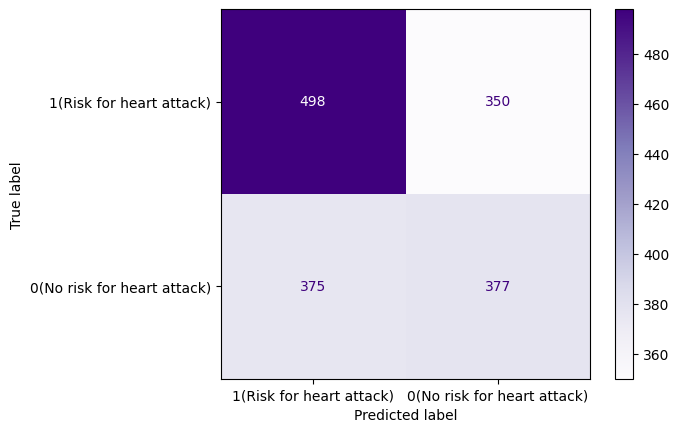

In [26]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy2)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (498): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 498 instances that do not have a risk of heart attack were correctly identified as such.

The top-right cell (350): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 350 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-left cell (375): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 375 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-right cell (377): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 377 instances that are at risk for heart attack were correctly identified as being at risk.

# Decision Tree:

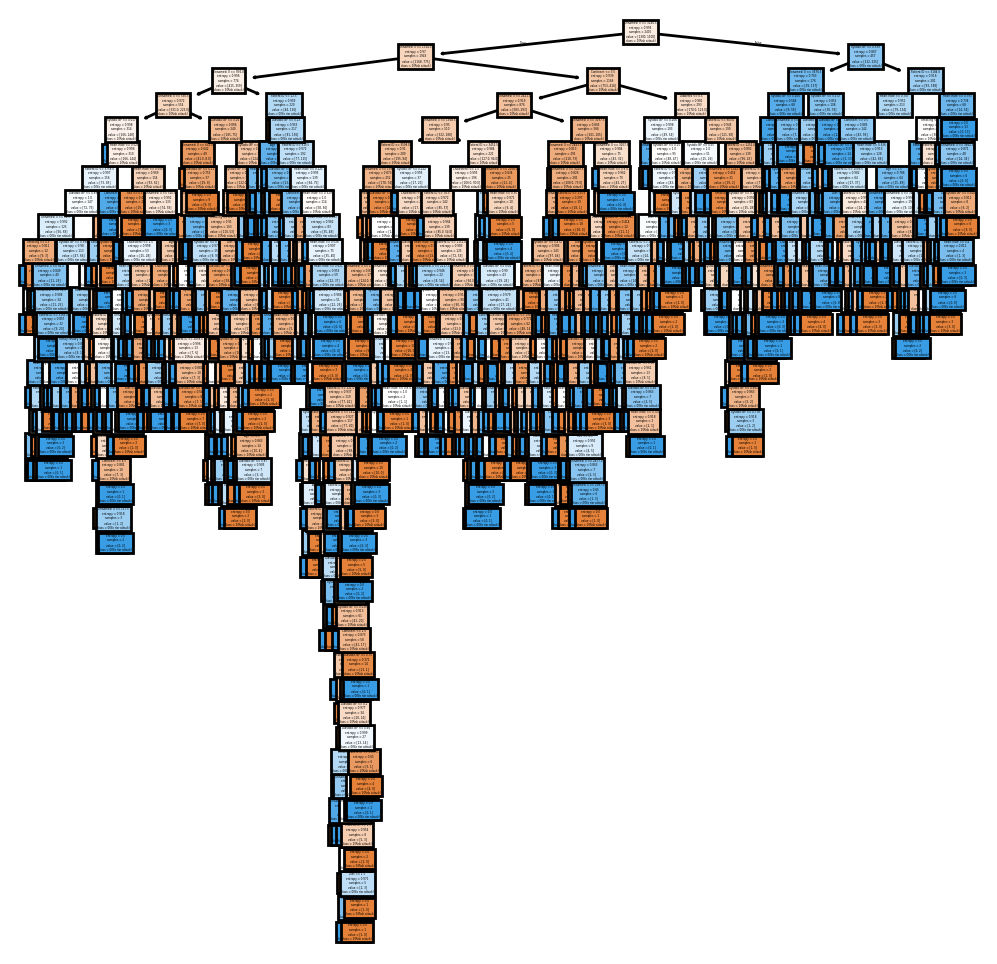

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf2,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

In this tree, data is split across multiple nodes representing decisions or conditions that lead to final classifications, in this case, "risk attack" and "no risk attack." Each node includes specific criteria and classification outcomes, with each level of the tree representing a decision step based on particular data features. This visualization helps in understanding the decision-making process and analyzing the data features in detail. However, it appears complex and somewhat difficult to read due to the tree’s depth and numerous branches, which suggests a complex model with many sub-decisions required to reach a final classification.

# Completing in model evaluation and selection:

In [28]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy2)
print("Accuracy:", accuracy)

# Error Rate 
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.546875
Error Rate: 0.453125
Sensitivity: 0.5013297872340425
Specificity: 0.5872641509433962
Precision: 0.5185694635488308


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 54%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 45%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 50%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 58%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 51%.

Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 54% of cases.

At a sensitivity of 50%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 58%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 51%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Splitting Data into: 80% Training and 20% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 80% training and 20% testing subsets.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy')

clf3 = clf3. fit (X_train, y_train)

y_pred_entropy3 = clf3.predict (X_test)

# confusion matrix:

[[500 348]
 [376 376]]


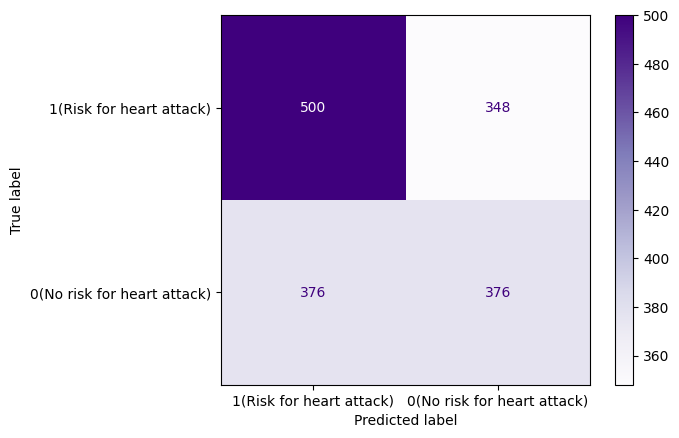

In [30]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy3)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (500): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 500 instances that do not have a risk of heart attack were correctly identified as such.

The top-right cell (348): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 348 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-left cell (376): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 376 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-right cell (376): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 376 instances that are at risk for heart attack were correctly identified as being at risk.

# Decision Tree:

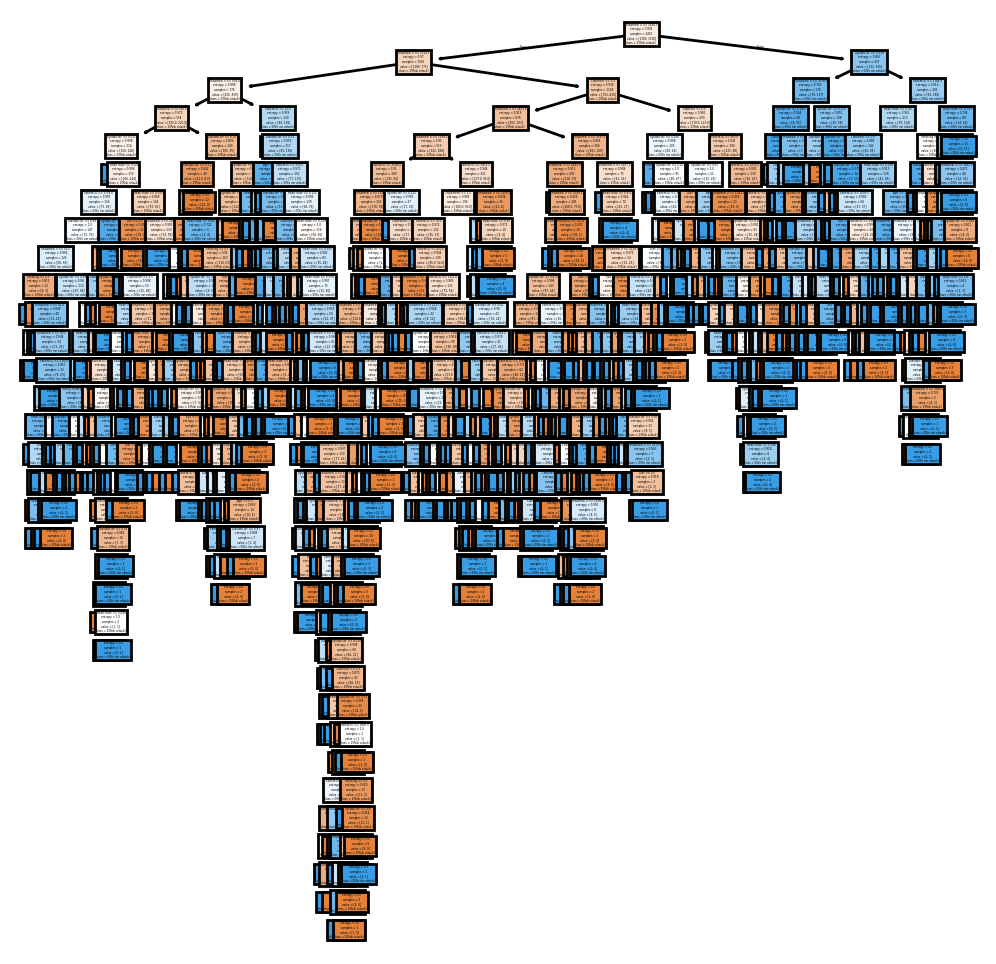

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

This image shows a complex Decision Tree used to classify data into two categories: "Risk attack" and "No risk attack." The tree starts from a root node, which represents the initial decision point, and branches out through multiple nodes that evaluate specific features or conditions in the data. At each node, the data is directed based on the results of these conditions until it reaches a leaf node, which represents the final classification.

While this tree provides a detailed view of the decision-making process, the high number of nodes and branches makes it challenging to read and interpret. This complexity reflects the model’s depth and the significant number of factors it analyzes to reach a classification decision. The visualization highlights both the model's power and the difficulty of manually tracing its decision 

# Completing in model evaluation and selection:

In [34]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy3)
print("Accuracy:", accuracy)

# Error Rate 
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.5475
Error Rate: 0.4525
Sensitivity: 0.5
Specificity: 0.589622641509434
Precision: 0.5193370165745856


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 54%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 45%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 50%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 58%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 51%.

Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 54% of cases.

At a sensitivity of 50%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 58%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 51%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Evaluate the models of INFORMATION GAIN :

In [37]:
data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],
    "70% training, 30% testing": [
        "0.5525", "0.4475", "0.51219512195", "0.5894568690095847", "0.5335753176043557"
    ],
    "60% training, 40% testing	": [
        "0.546875", "0.453125", "0.5013297872340425", "0.5872641509433962", 
        "0.5185694635488308 "    
    ],
    "	80% training, 20% testing": [
        "0.5475", "0.4525", "0.5", "0.589622641509434","0.5193370165745856"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

,Percentages,"70% training, 30% testing","60% training, 40% testing","80% training, 20% testing"
0,Accuracy,0.5525,0.546875,0.5475
1,Error Rate,0.4475,0.453125,0.4525
2,Sensitivity,0.51219512195,0.5013297872340425,0.5
3,Specificity,0.5894568690095847,0.5872641509433962,0.589622641509434
4,Precision,0.5335753176043557,0.5185694635488308,0.5193370165745856


The Information Gain results show the following model performance across different data splits for training and testing:

- Accuracy: The model trained on a 70% training set and 30% testing set achieved the highest accuracy at 0.5525 (or 55%), followed by the model trained on 80% training and 20% testing with an accuracy of 0.5475 (or 54.75%), and the model trained on 60% training and 40% testing with an accuracy of 0.546875 (or 54.6%).

- Error Rate: The model trained on a 60% training set and 40% testing set had the highest error rate at 0.453125 (or 45.3%), followed by the model trained on 80% training and 20% testing with an error rate of 0.4525 (or 45.2%), and the model trained on 70% training and 30% testing with an error rate of 0.4475 (or 44.75%).

- Sensitivity: The model trained on a 70% training set and 30% testing set achieved the highest sensitivity at 0.5122 (or 51%), followed by the model trained on 60% training and 40% testing with 0.5013 (or 50.1%), and the model trained on 80% training and 20% testing with 0.5 (or 50%).

- Specificity: The model trained on an 80% training set and 20% testing set obtained the highest specificity at 0.5896 (or 58.96%), followed by the model trained on 70% training and 30% testing with 0.5895 (or 58.94%), and the model trained on 60% training and 40% testing with 0.5873 (or 58.7%).

- Precision: The model trained on a 70% training set and 30% testing set achieved the highest precision at 0.5336 (or 53.3%), followed by the model trained on 80% training and 20% testing with 0.5193 (or 51.9%), and the model trained on 60% training and 40% testing with 0.5186 (or 51.8%).

Based on the values, the 70% training and 30% testing split appears to be the best choice for the model. This split achieves the highest accuracy (55.25%), which is typically a primary metric for assessing overall model performance. It also achieves the highest sensitivity (51.2%) and precision (53.3%), meaning it is effective at correctly identifying positive cases and minimizing false positives.
Additionally, the error rate for this split (44.75%) is the lowest among the three splits, indicating fewer incorrect predictions. Overall, this balance between sensitivity, specificity, and accuracy suggests it is well-suited for maintaining reliable predictions across different metrics.